In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
dataset = pd.read_csv("D:\house_data.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
dataset.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
dataset = dataset.fillna(method='ffill')

In [9]:
X = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']].values
y = dataset['price'].values





C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

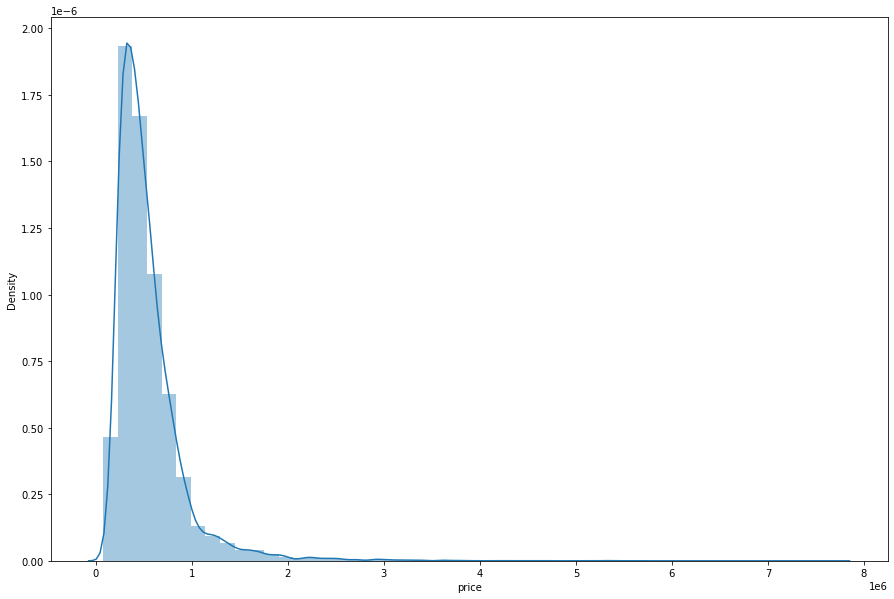

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [11]:
#Now we will train the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
#Apply Linear regression to the training dataset.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [13]:

#In this trained dataset, we will find the predicted values of the price that is Y-axis.
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)


       Actual     Predicted
0    297000.0  2.920900e+05
1   1580000.0  1.495501e+06
2    562100.0  5.067265e+05
3    631500.0  5.629858e+05
4    780000.0  8.491814e+05
5    485000.0  2.964865e+05
6    340000.0  4.558950e+05
7    335606.0  5.471705e+05
8    425000.0  6.469556e+05
9    490000.0  1.180993e+06
10   732000.0  6.830501e+05
11   389700.0  2.803470e+05
12   450000.0  3.083511e+05
13   357000.0  3.456720e+05
14   960000.0  8.479041e+05
15   257000.0  4.325054e+05
16   448000.0  2.628333e+05
17   610000.0  6.341888e+05
18   230950.0  3.254580e+05
19   377500.0  4.837436e+05
20   375000.0  3.629837e+05
21   410000.0  4.253320e+05
22   459000.0  5.174922e+05
23   190000.0  2.321967e+05
24   585000.0  5.820087e+05


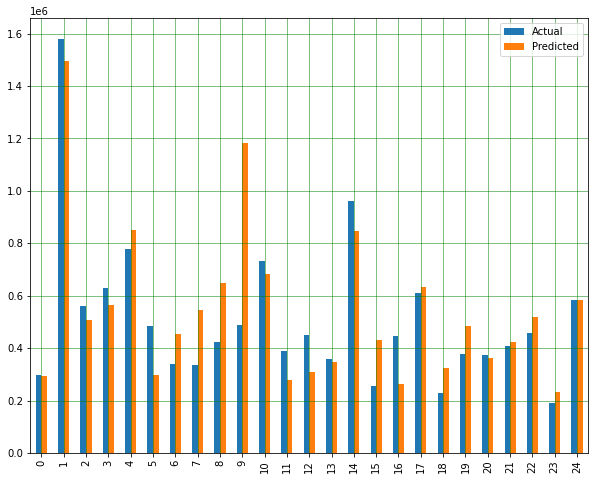

In [14]:
#Now we will plot the bar graph of actual value vs predicted value.
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
#Here we will find the error to find out the difference between what the model is predicting and the actual value.


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 135938.56849216344
Mean Squared Error: 42197484063.38069
Root Mean Squared Error: 205420.2620565476
